# Water Quality Prediction

## Dataset

### Sources

Link Download: https://www.kaggle.com/mssmartypants/water-quality 

### Context

This is a set of data created from imaginary data of water quality in an urban environment. I recommend using this dataset for educational purposes, for practice and to acquire the necessary knowledge.

### Content

What's inside is more than just rows and columns. You can see water ingredients listed as column names.

### Description

All attributes are numeric variables and they are listed bellow:

- aluminium - dangerous if greater than 2.8
- ammonia - dangerous if greater than 32.5
- arsenic - dangerous if greater than 0.01
- barium - dangerous if greater than 2
- cadmium - dangerous if greater than 0.005
- chloramine - dangerous if greater than 4
- chromium - dangerous if greater than 0.1
- copper - dangerous if greater than 1.3
- flouride - dangerous if greater than 1.5
- bacteria - dangerous if greater than 0
- viruses - dangerous if greater than 0
- lead - dangerous if greater than 0.015
- nitrates - dangerous if greater than 10
- nitrites - dangerous if greater than 1
- mercury - dangerous if greater than 0.002
- perchlorate - dangerous if greater than 56
- radium - dangerous if greater than 5
- selenium - dangerous if greater than 0.5
- silver - dangerous if greater than 0.1
- uranium - dangerous if greater than 0.3
- is_safe - class attribute {0 - not safe, 1 - safe}


## Import Library

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler, PowerTransformer, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, f1_score, plot_confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SVMSMOTE
from imblearn.pipeline import Pipeline
import pickle

## Data Loading

In [171]:
df = pd.read_csv("https://raw.githubusercontent.com/naadam13/hacktiv8_sources/main/waterQuality1.csv")
#df = pd.read_csv("waterQuality1.csv")
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


Data-data di atas menunjukkan konsentrasi suatu substansi dalam air dimana konsentrasi tersebut akan menentukan apakah air tersebut aman untuk dikonsumsi atau tidak.

## Exploratory Data Analysis

In [172]:
# Cek tipe data dan missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Terdapat keanehan dalam kolom "ammonia" dan "is_safe" dimana pada tampilan loading terlihat bahwa keduanya memiliki nilai numerik namun ketika memakai perintah .info() terdeteksi sebagai object.

Pada situs https://www.kaggle.com/mssmartypants/water-quality/discussion/250066 terdapat informasi bahwa terjadi kesalahan dalam penginputan data pada indeks 7551, 7568, 7890.

In [173]:
# Mengecek data pada kolom "ammonia"
print("df[ammonia][7551]: ", df["ammonia"][7551])
print("df[ammonia][7568]: ", df["ammonia"][7568])
print("df[ammonia][7890]: ", df["ammonia"][7890])
print("")
# Mengecek data pada kolom "is_safe"
print("df[is_safe][7551]: ", df["is_safe"][7551])
print("df[is_safe][7568]: ", df["is_safe"][7568])
print("df[is_safe][7890]: ", df["is_safe"][7890])

df[ammonia][7551]:  #NUM!
df[ammonia][7568]:  #NUM!
df[ammonia][7890]:  #NUM!

df[is_safe][7551]:  #NUM!
df[is_safe][7568]:  #NUM!
df[is_safe][7890]:  #NUM!


Hal ini dapat ditangani dengan mengubah data string menjadi missing values.

In [174]:
# Mengubah data object menjadi numerik dan mengubah data non-numerik menjadi missing values
df['ammonia'] = pd.to_numeric(df['ammonia'], errors = 'coerce')
df['is_safe'] = pd.to_numeric(df['is_safe'], errors = 'coerce')

In [175]:
# Mencari informasi statistik data
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7999.000000,7996.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7996.000000
mean,0.666158,14.278212,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673,0.114057
std,1.265145,8.878930,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


Pada deskriptif statistik di atas terlihat bahwa hanya nilai minimum "ammonia" yang bernilai negatif.

In [176]:
# Mengecek jumlah konsentrasi negatif
df[df["ammonia"]<0].count()

aluminium      10
ammonia        10
arsenic        10
barium         10
cadmium        10
chloramine     10
chromium       10
copper         10
flouride       10
bacteria       10
viruses        10
lead           10
nitrates       10
nitrites       10
mercury        10
perchlorate    10
radium         10
selenium       10
silver         10
uranium        10
is_safe        10
dtype: int64

Berdasarkan situs https://www.researchgate.net/post/Is-it-possible-to-have-negative-NH3-concentration-from-samples-taken-from-the-field-where-NH3-volatilization-was-measured diketahui bahwa hal ini dapat disebabkan oleh kesalahan dalam pengambilan data. Data negatif tersebut tetap dapat dianggap sebagai nilai minimum, sehingga data tersebut tidak perlu didrop. Jumlah data yang bernilai negatif tersebut hanya 10 data, sehingga tidak terlalu mempengaruhi data secara keseluruhan. 

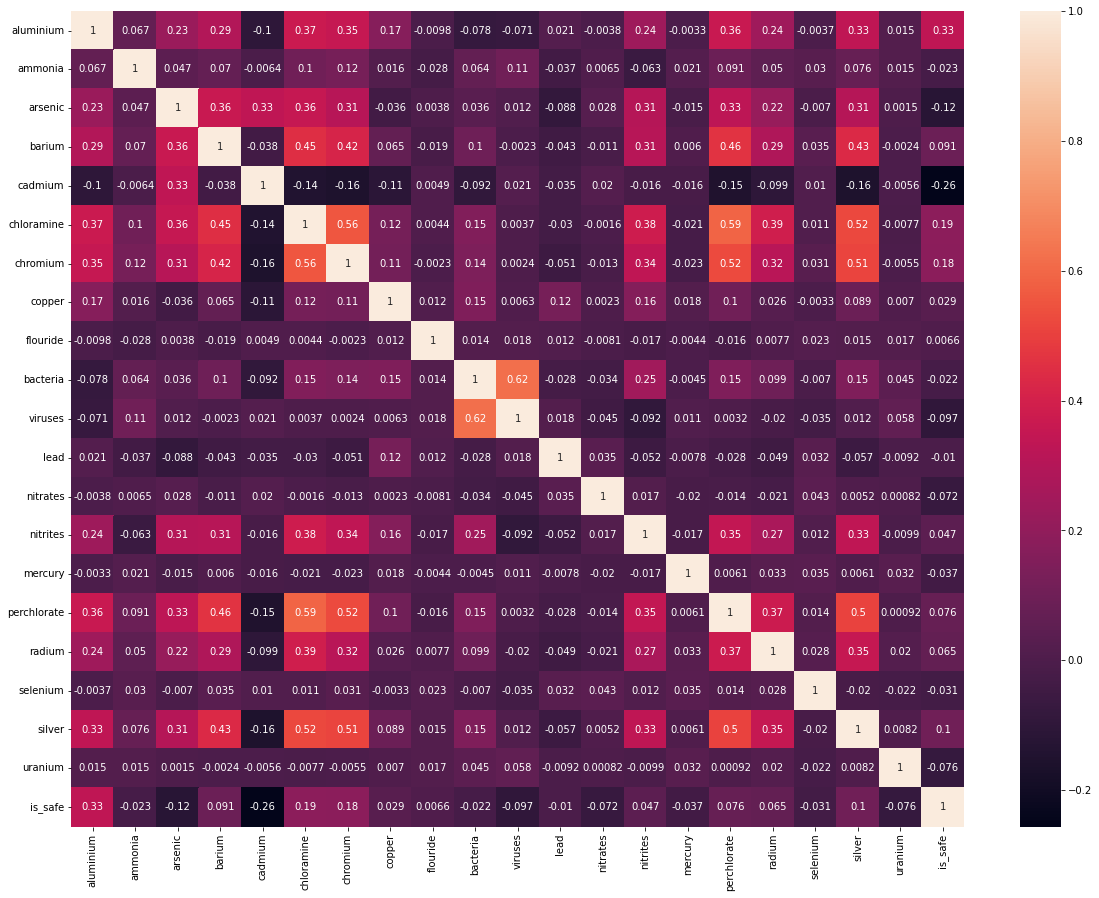

In [177]:
# Plot heatmap pada df
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

Terlihat bahwa mayoritas korelasi antar kolom hampir bernilai 0. Beberapa kolom yang memiliki korelasi yang sedikit jauh dari 0 adalah:

- bacteria dan viruses (0.62)
- chloramine dan perchlorate (0.59)
- chloramine dan chromium (0.56)

dan kolom-kolom yang memiliki korelasi yang kuat dengan kolom is_safe adalah: 

- aluminium (0.33)
- cadmium (-0.26)

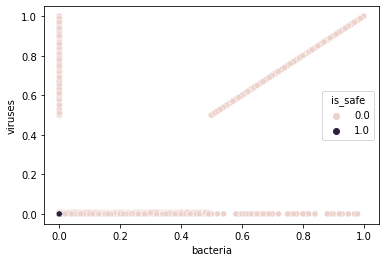

In [178]:
# Plot grafik hubungan 'bacteria' dan 'viruses'
sns.scatterplot(data=df, x='bacteria',y='viruses', hue='is_safe')

Pada grafik bacteria-viruses terlihat bahwa air yang aman untuk dikonsumsi berada pada ujung kiri bawah. Hal ini dapat menyimpulkan bahwa air yang aman untuk dikonsumsi adalah air yang tidak terkontaminasi oleh bakteri dan virus. Grafik di atas juga menginformasikan bahwa kehadiran bakteri juga mempengaruhi kehadiran virus, begitu juga sebaliknya.

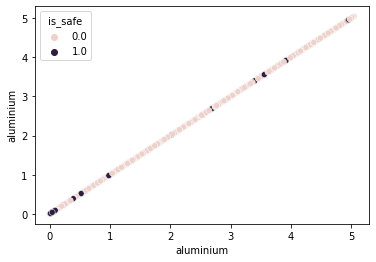

In [179]:
# Plot grafik hubungan 'aluminium' dan 'is_safe'
sns.scatterplot(data=df, x='aluminium',y='aluminium', hue='is_safe')

Pada grafik di atas menunjukkan bahwa air yang aman untuk dikonsumsi berada paling banyak pada ujung kiri bawah sehingga menunjukkan bahwa konsentrasi aluminimum pada air mempengaruhi kualitas air tersebut.

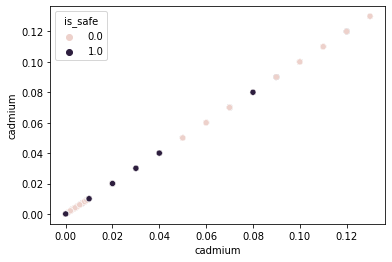

In [180]:
# Plot grafik hubungan 'cadmium' dan 'is_safe'
sns.scatterplot(data=df, x='cadmium',y='cadmium', hue='is_safe')

Pada grafik di atas menunjukkan bahwa air yang aman untuk dikonsumsi berada paling banyak pada ujung kiri bawah sehingga menunjukkan bahwa konsentrasi cadmium pada air mempengaruhi kualitas air tersebut. Kesimpulan ini mirip dengan grafik pada aluminimum, namun nilai korelasi antar keduanya sangat berjauhan. Hal ini menjadi kontradiktif dan ada kemungkinan terjadi kesalahan dalam pengambilan data. Walaupun begitu, data ini tetap dipakai dalam pekerjaan ini karena tidak ada referensi lain yang disediakan oleh sumber data ini.

## Data Preprocessing

In [181]:
# Definisi data X
X = df.drop(["is_safe"], axis = 1)
X

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [182]:
# Definisi data y
y = df["is_safe"]
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
7994    1.0
7995    1.0
7996    1.0
7997    1.0
7998    1.0
Name: is_safe, Length: 7999, dtype: float64

In [183]:
# Split data menjadi data traintest dan data inference
X_traintest, X_inf, y_traintest, y_inf = train_test_split(X, y, test_size=0.001)

In [184]:
# Split data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X_traintest, y_traintest, test_size=0.3)

In [185]:
# Bentuk fungsi untuk menunjukkan plot grafik data
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

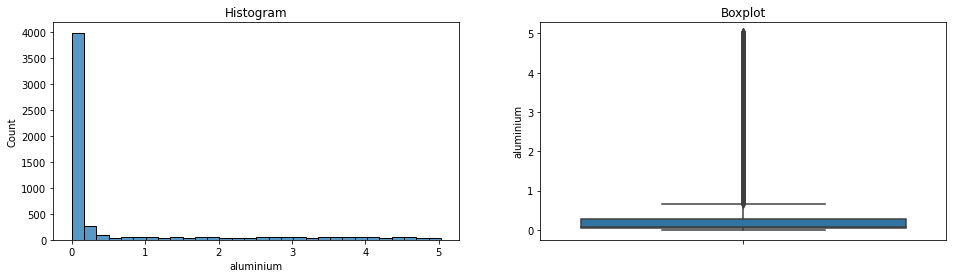

Skewness value for aluminium :  2.0022919782073245


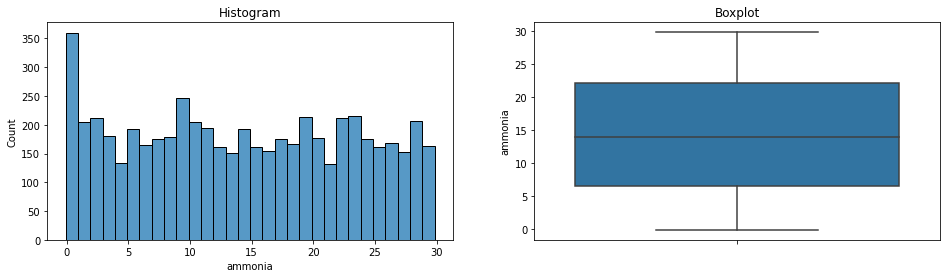

Skewness value for ammonia :  0.038615163252652476


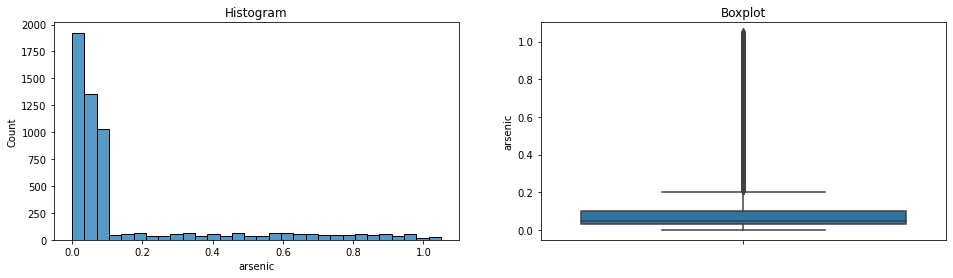

Skewness value for arsenic :  1.9819838403817087


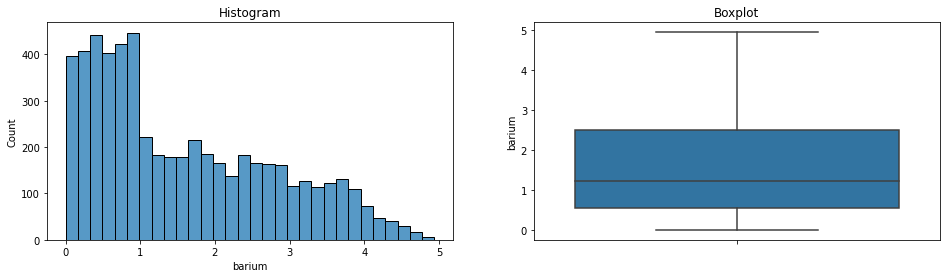

Skewness value for barium :  0.6560099456439749


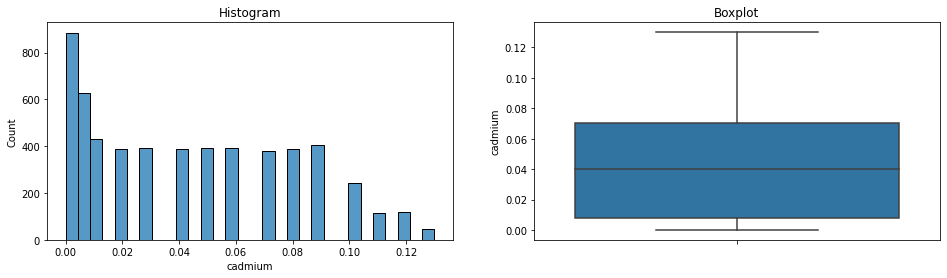

Skewness value for cadmium :  0.4776949681378371


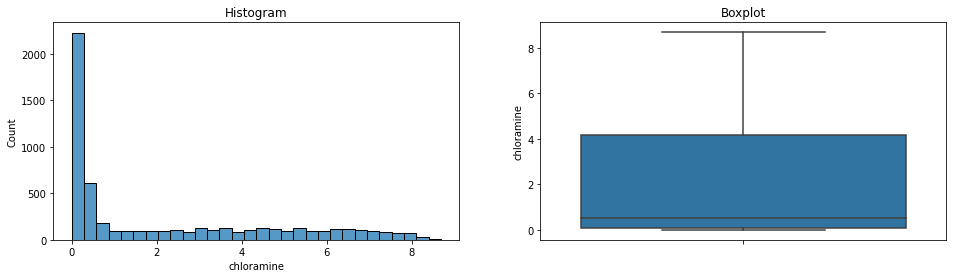

Skewness value for chloramine :  0.8978213407520846


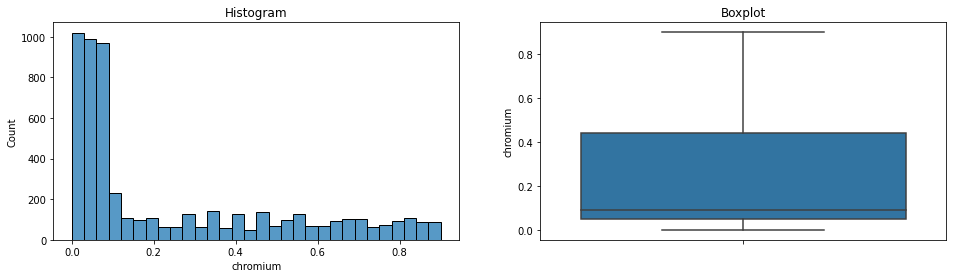

Skewness value for chromium :  1.0326853913617722


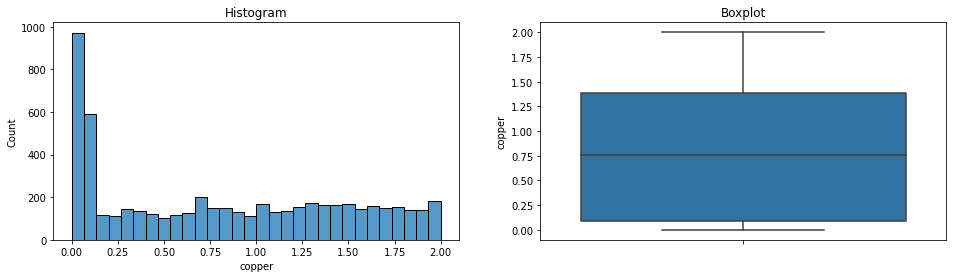

Skewness value for copper :  0.23454300282484314


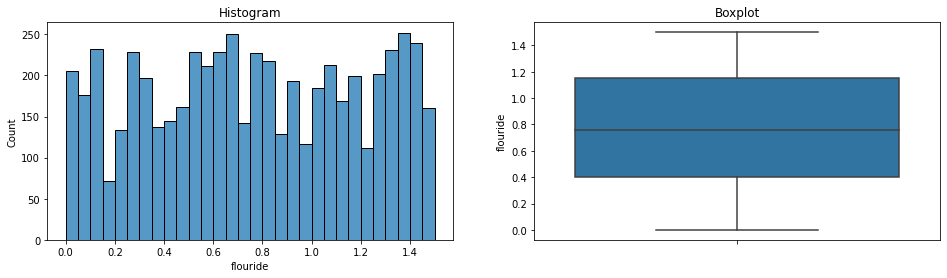

Skewness value for flouride :  -0.027924057565556805


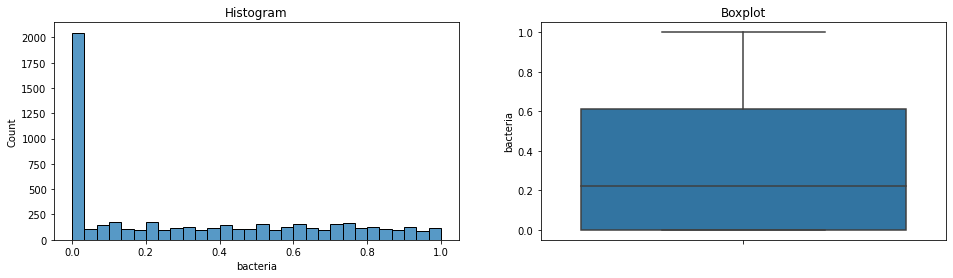

Skewness value for bacteria :  0.5393570653957317


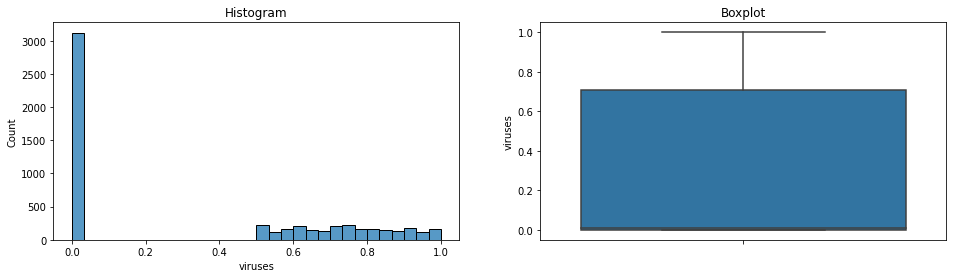

Skewness value for viruses :  0.422864663351907


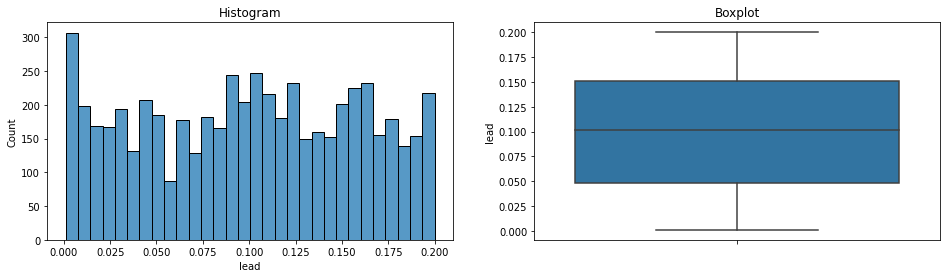

Skewness value for lead :  -0.061232194659183614


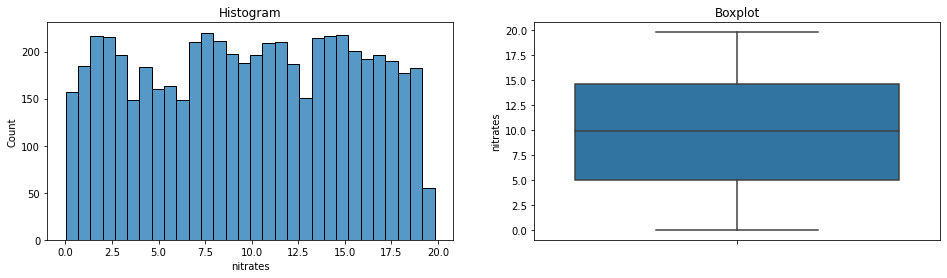

Skewness value for nitrates :  -0.04260403486869498


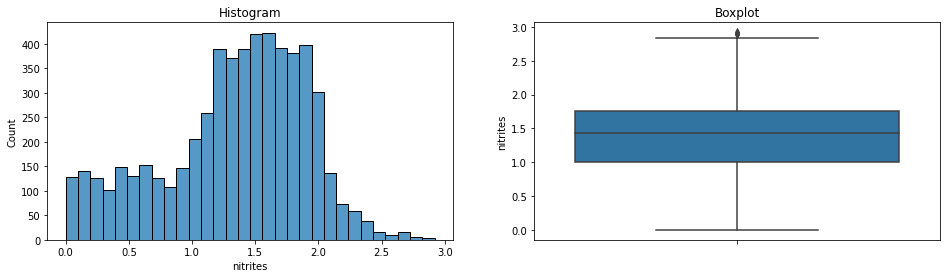

Skewness value for nitrites :  -0.5142743917322138


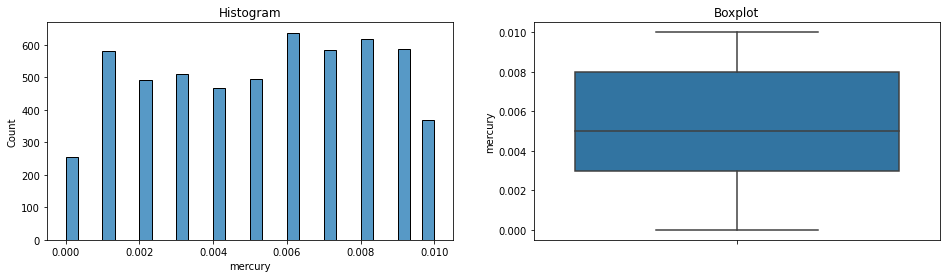

Skewness value for mercury :  -0.10547588526853284


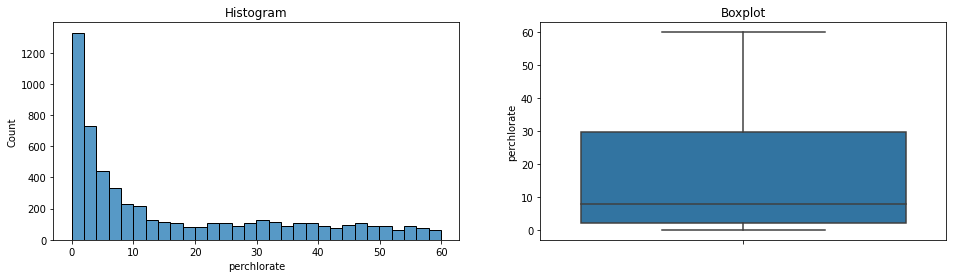

Skewness value for perchlorate :  0.9407028889615496


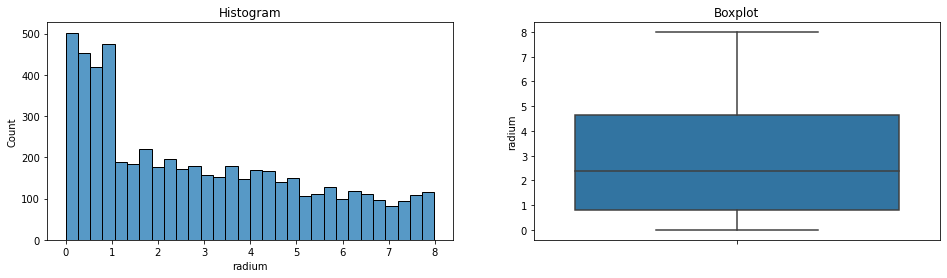

Skewness value for radium :  0.5636943513909242


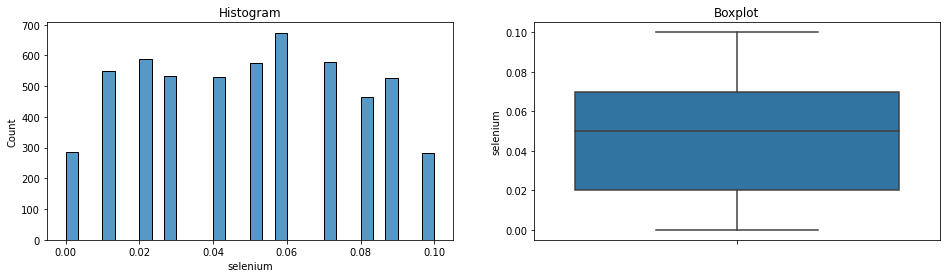

Skewness value for selenium :  0.010418261033086594


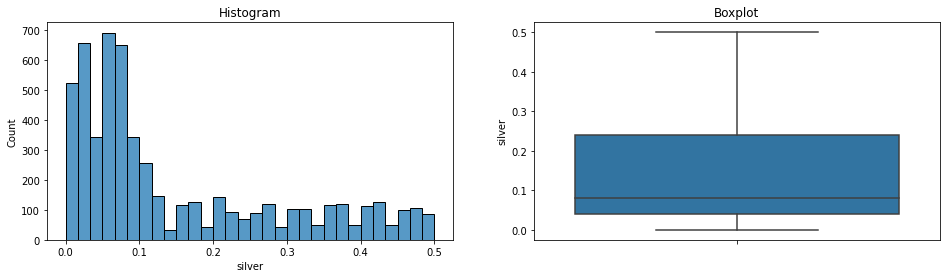

Skewness value for silver :  1.025352578890614


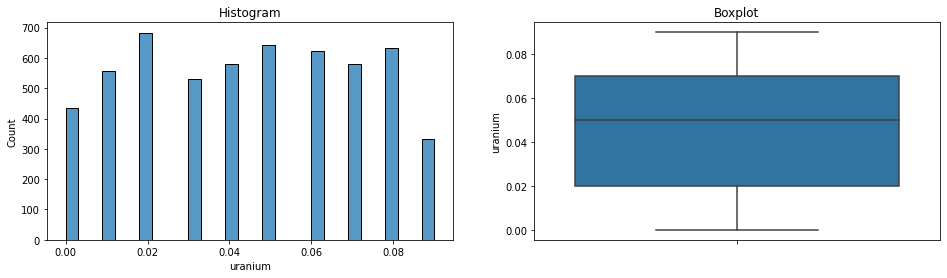

Skewness value for uranium :  -0.010360852438378844


In [186]:
# Menunjukkan plot grafik data numerik
for col in X_train.columns:
    diagnostic_plots(X_train, col)
    print("Skewness value for", col, ": ", X_train[col].skew())

"Skewness Value" menunjukkan apakah data tersebut terdistribusi normal/Gaussian atau *skewed*. Data yang terdistribusi secara normal/Gaussian memiliki rentang -0.5 <= "Skewness Value" <= 0.5 dan sisanya merupakan data yang terdistribusi secara *skewed*. Metode untuk menentukan outlier pada kedua tipe data tersebut berbeda. Terlihat bahwa distribusi data normal dengan distribusi data *skewed* seimbang pada dataset ini.

In [187]:
# Function to find upper and lower boundaries for normally distributed variables
# Calculate the boundaries outside which sit the outliers for a Gaussian distribution

def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [188]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [189]:
# calculate boundaries for aluminium
aluminium_upper_limit, aluminium_lower_limit = find_skewed_boundaries(X_train, 'aluminium', 1.5)
aluminium_upper_limit, aluminium_lower_limit
# calculate boundaries for arsenic
arsenic_upper_limit, arsenic_lower_limit = find_skewed_boundaries(X_train, 'arsenic', 1.5)
arsenic_upper_limit, arsenic_lower_limit
# calculate boundaries for nitrites
nitrites_upper_limit, nitrites_lower_limit = find_normal_boundaries(X_train, 'nitrites')
nitrites_upper_limit, nitrites_lower_limit

print('aluminium_upper_limit : ', aluminium_upper_limit)
print('aluminium_lower_limit : ', aluminium_lower_limit, '\n')
print('arsenic_upper_limit : ', arsenic_upper_limit)
print('arsenic_lower_limit : ', arsenic_lower_limit, '\n')
print('nitrites_upper_limit : ', nitrites_upper_limit)
print('nitrites_lower_limit : ', nitrites_lower_limit)

aluminium_upper_limit :  0.6649999999999999
aluminium_lower_limit :  -0.33499999999999996 

arsenic_upper_limit :  0.20500000000000002
arsenic_lower_limit :  -0.07500000000000001 

nitrites_upper_limit :  3.048209865956442
nitrites_lower_limit :  -0.37771102812342994


In [190]:
# Persentase Outlier terhadap data

print('Total data : {}'.format(len(X_train)))
totaldata = len(X_train)
print('')
print('Outlier aluminium : {}'.format(len(X_train[X_train['aluminium'] > aluminium_upper_limit])))
print('% Outlier aluminium : {}'.format(len(X_train[X_train['aluminium'] > aluminium_upper_limit])/len(X_train) * 100))
print('')
print('Outlier arsenic : {}'.format(len(X_train[X_train['arsenic'] > arsenic_upper_limit])))
print('% Outlier arsenic : {}'.format(len(X_train[X_train['arsenic'] > arsenic_upper_limit])/len(X_train) * 100))
print('')
print('Outlier nitrites : {}'.format(len(X_train[X_train['nitrites'] < nitrites_lower_limit])))
print('% Outlier nitrites : {}'.format(len(X_train[X_train['nitrites'] < nitrites_lower_limit])/len(X_train) * 100))

Total data : 5593

Outlier aluminium : 1215
% Outlier aluminium : 21.723583050241373

Outlier arsenic : 1141
% Outlier arsenic : 20.40050062578223

Outlier nitrites : 0
% Outlier nitrites : 0.0


Terlihat bahwa data aluminium dan data arsenic memiliki outlier > 20% sehingga outlier tersebut tidak perlu ditangani, sedangkan data nitrites tidak memiliki outlier walaupun pada plotbox terlihat adanya sedikit outlier. Hal ini dikarenakan plotbox memiliki prinsip kerja yang lebih sesuai untuk data yang terdistribusi normal, sedangkan distribusi nitrites bersifat *skewed*. 

In [191]:
# Mengecek missing values
X_train.isnull().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
dtype: int64

In [192]:
# Mengecek missing values
y_train.isnull().sum()

3

Missing values yang terkandung dalam data hanya sedikit sekali, sehingga dapat langsung didrop.

In [193]:
# Pendropan missing values untuk data numerikal
X_train.dropna(inplace=True)
y_train.dropna(inplace=True)

In [194]:
# Mengecek missing values
X_train.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
dtype: int64

In [195]:
# Mengecek missing values
y_train.isnull().sum()

0

In [196]:
# Menyesuaikan indeks X_train dengan y_train
y_train = y_train[X_train.index]

Jumlah persebaran data target y_train : 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.0    4934
1.0     656
Name: is_safe, dtype: int64

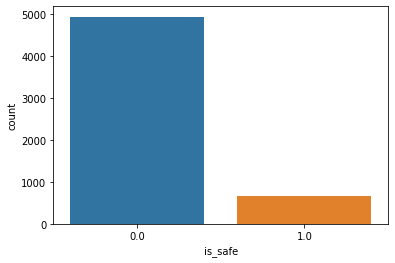

In [197]:
# Plot persebaran data target y_train
sns.countplot(y_train)
# Jumlah persebaran data target y_train
print("Jumlah persebaran data target y_train : ")
print("")
y_train.value_counts()

Plot di atas memberikan informasi bahwa data tersebut bersifat *imbalance* yang artinya salah satu data jauh lebih banyak bila dibandingkan dengan data yang lainnya, dan akan mengakibatkan akurasi tidak sesuai. Untuk menangani hal ini, salah satu caranya adalah dengan melakukan metode OverSampling.

Dalam akhir pekerjaan ini akan dilakukan metode pipeline, sehingga perlu adanya penduplikasian data yang berguna untuk pengujian terhadap model-model klasifikasi yang ada. Data asli akan digunakan metode pipeline, sedangkan data duplikat akan dilakukan pengujian terhadap berbagai model-model.

In [198]:
# Penduplikasian data
X_train_1 = X_train.copy()
y_train_1 = y_train.copy()

In [199]:
# Definisi model scaling
stdscaler_1 = StandardScaler()
minmax_1 = MinMaxScaler()
# Pelatihan model scaling
num_features = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 
                'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
                'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium',
                'selenium', 'silver', 'uranium']
X_train_1[num_features] = stdscaler_1.fit_transform(X_train_1[num_features])
#X_train_1[num_features] = minmax_1.fit_transform(X_train_1[num_features])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.0    4934
1.0    4934
Name: is_safe, dtype: int64

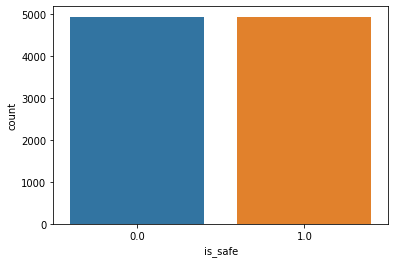

In [200]:
# Definisi metode over sampling
ros_1 = RandomOverSampler()
smote_1 = SMOTE()
svmsmote_1 = SVMSMOTE()
adasyn_1 = ADASYN()
# resampling X_train_1, y_train_1
#X_train_1, y_train_1 = ros_1.fit_resample(X_train_1, y_train_1)
X_train_1, y_train_1 = smote_1.fit_resample(X_train_1, y_train_1)
#X_train_1, y_train_1 = svmsmote_1.fit_resample(X_train_1, y_train_1)
#X_train_1, y_train_1 = adasyn_1.fit_resample(X_train_1, y_train_1)
# Plot persebaran data target y_train setelah oversampling
sns.countplot(y_train_1)
# Jumlah persebaran data target y_train setelah oversampling
y_train_1.value_counts()

Dengan metode oversampling, maka data-data tersebut tidak lagi imbalance.

Setelah penanganan data train, maka akan dilakukan penanganan terhadap data test.

In [201]:
# Pendropan missing values untuk data numerikal
X_test.dropna(inplace=True)
y_test.dropna(inplace=True)
# Menyesuaikan indeks X_test dengan y_test
y_test = y_test[X_test.index]
# Penduplikasian data
X_test_1 = X_test.copy()
y_test_1 = y_test.copy()
# Pelatihan model scaling
X_test_1[num_features] = stdscaler_1.transform(X_test_1[num_features])
#X_test_1[num_features] = minmax_1.transform(X_test_1[num_features])

## Model Definition

In [202]:
# Definisi model logistic regression
logit_1 = LogisticRegression()
# Definisi model SVM
svm_1 = SVC()
# Definisi model KNN
knn_1 = KNeighborsClassifier()
# Definisi model SGD
sgd_1 = SGDClassifier()
# Definisi model GNB
gnb_1 = GaussianNB()
# Definisi model decision tree
dt_1 = DecisionTreeClassifier()
# Definisi model random forest
rf_1 = RandomForestClassifier()

## Model Training

In [203]:
# learn a logistic regression on the scaled training data
logit_1.fit(X_train_1, y_train_1)
# learn an SVM on the scaled training data
svm_1.fit(X_train_1, y_train_1)
# learn a knn on the scaled training data
knn_1.fit(X_train_1, y_train_1)
# learn a decision tree on the scaled training data
dt_1.fit(X_train_1, y_train_1)
# learn a random forest on the scaled training data
rf_1.fit(X_train_1, y_train_1)
# learn a gnb on the scaled training data
gnb_1.fit(X_train_1, y_train_1)
# learn an sgd on the scaled training data
sgd_1.fit(X_train_1, y_train_1)

SGDClassifier()

## Model Evaluation

In [204]:
# Membuat data prediksi dengan logistic regression
y_train_1_pred_1 = logit_1.predict(X_train_1)
y_pred_1_1 = logit_1.predict(X_test_1)
# Membuat data prediksi dengan SVM
y_train_1_pred_2 = svm_1.predict(X_train_1)
y_pred_1_2 = svm_1.predict(X_test_1)
# Membuat data prediksi dengan KNN
y_train_1_pred_3 = knn_1.predict(X_train_1)
y_pred_1_3 = knn_1.predict(X_test_1)
# Membuat data prediksi dengan decision tree
y_train_1_pred_4 = dt_1.predict(X_train_1)
y_pred_1_4 = dt_1.predict(X_test_1)
# Membuat data prediksi dengan random forest
y_train_1_pred_5 = rf_1.predict(X_train_1)
y_pred_1_5 = rf_1.predict(X_test_1)
# Membuat data prediksi dengan gnb
y_train_1_pred_6 = gnb_1.predict(X_train_1)
y_pred_1_6 = gnb_1.predict(X_test_1)
# Membuat data prediksi dengan sgd
y_train_1_pred_7 = sgd_1.predict(X_train_1)
y_pred_1_7 = sgd_1.predict(X_test_1)

In [205]:
# Cek classification_report dengan logistic regression
print('classification_report - Logistic Regression - y_train_1 dan y_train_1_pred_1')
print('\n')
print(classification_report(y_train_1, y_train_1_pred_1))
print('')
print('classification_report - Logistic Regression - y_test_1 dan y_pred_1_1')
print('\n')
print(classification_report(y_test_1, y_pred_1_1))

classification_report - Logistic Regression - y_train_1 dan y_train_1_pred_1


              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80      4934
         1.0       0.81      0.77      0.79      4934

    accuracy                           0.79      9868
   macro avg       0.80      0.79      0.79      9868
weighted avg       0.80      0.79      0.79      9868


classification_report - Logistic Regression - y_test_1 dan y_pred_1_1


              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88      2142
         1.0       0.32      0.77      0.45       256

    accuracy                           0.80      2398
   macro avg       0.64      0.79      0.67      2398
weighted avg       0.90      0.80      0.83      2398



In [206]:
# Cek classification_report dengan SVM
print('classification_report - SVM - y_train_1 dan y_train_1_pred_2')
print('\n')
print(classification_report(y_train_1, y_train_1_pred_2))
print('')
print('classification_report - SVM - y_test_1 dan y_pred_1_2')
print('\n')
print(classification_report(y_test_1, y_pred_1_2))

classification_report - SVM - y_train_1 dan y_train_1_pred_2


              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      4934
         1.0       0.95      0.99      0.97      4934

    accuracy                           0.97      9868
   macro avg       0.97      0.97      0.97      9868
weighted avg       0.97      0.97      0.97      9868


classification_report - SVM - y_test_1 dan y_pred_1_2


              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95      2142
         1.0       0.59      0.78      0.67       256

    accuracy                           0.92      2398
   macro avg       0.78      0.86      0.81      2398
weighted avg       0.93      0.92      0.92      2398



In [207]:
# Cek classification_report dengan KNN
print('classification_report - KNN - y_train_1 dan y_train_1_pred_3')
print('\n')
print(classification_report(y_train_1, y_train_1_pred_3))
print('')
print('classification_report - KNN - y_test_1 dan y_pred_1_3')
print('\n')
print(classification_report(y_test_1, y_pred_1_3))

classification_report - KNN - y_train_1 dan y_train_1_pred_3


              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91      4934
         1.0       0.85      1.00      0.92      4934

    accuracy                           0.91      9868
   macro avg       0.93      0.91      0.91      9868
weighted avg       0.93      0.91      0.91      9868


classification_report - KNN - y_test_1 dan y_pred_1_3


              precision    recall  f1-score   support

         0.0       0.97      0.77      0.86      2142
         1.0       0.30      0.80      0.43       256

    accuracy                           0.78      2398
   macro avg       0.63      0.79      0.65      2398
weighted avg       0.90      0.78      0.81      2398



In [208]:
# Cek classification_report dengan decision tree
print('classification_report - decision tree - y_train_1 dan y_train_1_pred_4')
print('\n')
print(classification_report(y_train_1, y_train_1_pred_4))
print('')
print('classification_report - decision tree - y_test_1 dan y_pred_1_4')
print('\n')
print(classification_report(y_test_1, y_pred_1_4))

classification_report - decision tree - y_train_1 dan y_train_1_pred_4


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4934
         1.0       1.00      1.00      1.00      4934

    accuracy                           1.00      9868
   macro avg       1.00      1.00      1.00      9868
weighted avg       1.00      1.00      1.00      9868


classification_report - decision tree - y_test_1 dan y_pred_1_4


              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      2142
         1.0       0.72      0.82      0.77       256

    accuracy                           0.95      2398
   macro avg       0.85      0.89      0.87      2398
weighted avg       0.95      0.95      0.95      2398



In [209]:
# Cek classification_report dengan random forest
print('classification_report - random forest - y_train_1 dan y_train_1_pred_5')
print('\n')
print(classification_report(y_train_1, y_train_1_pred_5))
print('')
print('classification_report - random forest - y_test_1 dan y_pred_1_5')
print('\n')
print(classification_report(y_test_1, y_pred_1_5))

classification_report - random forest - y_train_1 dan y_train_1_pred_5


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4934
         1.0       1.00      1.00      1.00      4934

    accuracy                           1.00      9868
   macro avg       1.00      1.00      1.00      9868
weighted avg       1.00      1.00      1.00      9868


classification_report - random forest - y_test_1 dan y_pred_1_5


              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      2142
         1.0       0.78      0.80      0.79       256

    accuracy                           0.95      2398
   macro avg       0.88      0.89      0.88      2398
weighted avg       0.96      0.95      0.95      2398



In [210]:
# Cek classification_report dengan gnb
print('classification_report - gnb - y_train_1 dan y_train_1_pred_6')
print('\n')
print(classification_report(y_train_1, y_train_1_pred_6))
print('')
print('classification_report - gnb - y_test_1 dan y_pred_1_6')
print('\n')
print(classification_report(y_test_1, y_pred_1_6))

classification_report - gnb - y_train_1 dan y_train_1_pred_6


              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      4934
         1.0       0.79      0.79      0.79      4934

    accuracy                           0.79      9868
   macro avg       0.79      0.79      0.79      9868
weighted avg       0.79      0.79      0.79      9868


classification_report - gnb - y_test_1 dan y_pred_1_6


              precision    recall  f1-score   support

         0.0       0.97      0.78      0.86      2142
         1.0       0.30      0.77      0.43       256

    accuracy                           0.78      2398
   macro avg       0.63      0.78      0.65      2398
weighted avg       0.89      0.78      0.82      2398



In [211]:
# Cek classification_report dengan sgd
print('classification_report - sgd - y_train_1 dan y_train_1_pred_7')
print('\n')
print(classification_report(y_train_1, y_train_1_pred_7))
print('')
print('classification_report - sgd - y_test_1 dan y_pred_1_7')
print('\n')
print(classification_report(y_test_1, y_pred_1_7))

classification_report - sgd - y_train_1 dan y_train_1_pred_7


              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79      4934
         1.0       0.80      0.75      0.78      4934

    accuracy                           0.78      9868
   macro avg       0.79      0.78      0.78      9868
weighted avg       0.79      0.78      0.78      9868


classification_report - sgd - y_test_1 dan y_pred_1_7


              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88      2142
         1.0       0.33      0.78      0.47       256

    accuracy                           0.81      2398
   macro avg       0.65      0.80      0.67      2398
weighted avg       0.90      0.81      0.84      2398



Mengingat bahwa data originalnya bersifat imbalance, maka besaran yang dapat dijadikan acuan adalah precision, recall, dan f1-score. Nilai yang paling perlu diperhatikan adalah nilai precision dari label 1.0, karena kita menginginkan agar air yang tidak aman untuk dikonsumsi (label 0.0) tidak terhitung sebagai air yang aman untuk dikonsumsi (label 1.0), yang artinya kita menginginkan agar nilai FP (False Positive) sekecil mungkin. Terlihat bahwa model yang memiliki nilai precision, recall, dan f1-score yang tinggi adalah model random forest sehingga model tersebut akan dipakai sebagai model akhir yang akan dimasukkan ke dalam pipeline. Walau begitu, perlu diadakan Hyperparameter tuning untuk mengoptimalkan model tersebut.

In [212]:
# Konfigurasi Random Forest
rf_test = RandomForestClassifier()
# Membangun parameter random grid search
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
max_features = ['auto', 'log2', None]
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid_test = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
rf_randomcv_test = RandomizedSearchCV(estimator=rf_test, param_distributions=random_grid_test,
                                 n_iter=10,
                                 cv=5, random_state=46, n_jobs=-1)
# Training data dengan random grid search
rf_randomcv_test.fit(X_train_1, y_train_1)
# Menentukan parameter terbaik dari random grid search
rf_best_random_test = rf_randomcv_test.best_estimator_
# prediksi data dengan random grid search
y_train_1_pred_test = rf_best_random_test.predict(X_train_1)
y_pred_1_test = rf_best_random_test.predict(X_test_1)
# Evaluasi data
print('classification_report - random forest - y_train_1 dan y_train_1_pred_test')
print('\n')
print(classification_report(y_train_1, y_train_1_pred_test))
print('')
print('classification_report - random forest - y_test_1 dan y_pred_1_test')
print('\n')
print(classification_report(y_test_1, y_pred_1_test))

classification_report - random forest - y_train_1 dan y_train_1_pred_test


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4934
         1.0       1.00      1.00      1.00      4934

    accuracy                           1.00      9868
   macro avg       1.00      1.00      1.00      9868
weighted avg       1.00      1.00      1.00      9868


classification_report - random forest - y_test_1 dan y_pred_1_test


              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      2142
         1.0       0.78      0.82      0.80       256

    accuracy                           0.96      2398
   macro avg       0.88      0.89      0.89      2398
weighted avg       0.96      0.96      0.96      2398



Berdasarkan data di atas maka telah terbukti bahwa hyperparameter tuning mampu mengoptimalkan model Random Forest, dengan adanya peningkatan pada nilai precision, recall, dan F-1 score.

Langkah selanjutnya dapat dilakukan model Pipeline dengan data asli X_train, X_test, y_train, dan y_test. 

In [213]:
# Membangun model Pipeline
pipe = Pipeline(steps = [('stdscaler', StandardScaler()), ('smote', SMOTE()), ('rf', RandomForestClassifier())])
# Membangun parameter random grid search
random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features':max_features,
               'rf__max_depth':max_depth,
               'rf__min_samples_split':min_samples_split,
               'rf__min_samples_leaf':min_samples_leaf,
               'rf__criterion':['entropy','gini']}
rf_randomcv = RandomizedSearchCV(estimator=pipe, param_distributions=random_grid,
                                 n_iter=10,
                                 cv=5, random_state=46, n_jobs=-1)
# Training data dengan random grid search
rf_randomcv.fit(X_train, y_train)
# Menentukan parameter terbaik dari random grid search
rf_best_random = rf_randomcv.best_estimator_
# prediksi data dengan random grid search
y_train_pred = rf_best_random.predict(X_train)
y_pred = rf_best_random.predict(X_test)
# Evaluasi data
print('classification_report - random forest - y_train dan y_train_pred')
print('\n')
print(classification_report(y_train, y_train_pred))
print('')
print('classification_report - random forest - y_test dan y_pred')
print('\n')
print(classification_report(y_test, y_pred))

classification_report - random forest - y_train dan y_train_pred


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4934
         1.0       1.00      1.00      1.00       656

    accuracy                           1.00      5590
   macro avg       1.00      1.00      1.00      5590
weighted avg       1.00      1.00      1.00      5590


classification_report - random forest - y_test dan y_pred


              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      2142
         1.0       0.78      0.84      0.81       256

    accuracy                           0.96      2398
   macro avg       0.88      0.90      0.89      2398
weighted avg       0.96      0.96      0.96      2398



Terlihat bahwa hasil yang didapat (precision, recall, dan f-1 score) tidak jauh berbeda dengan sebelumnya. Walaupun data terlihat masih bersifat overfit, namun perbedaan nilai-nilai tersebut sudah semakin mendekat.

## Model Saving

Dalam proses model employment diperlukan adanya penyimpanan model terbaik agar dapat digunakan dalam proses deployment ke Heroku.

In [214]:
filename = open("rf_best_random.pkl", "wb")
pickle.dump(rf_best_random, filename)
filename.close()

## Model Inference

In [215]:
# Loading data inference
X_inf

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
3128,0.02,17.74,0.09,4.89,0.080,2.79,0.03,1.40,0.50,0.28,0.005,0.044,2.82,1.97,0.001,53.35,7.90,0.04,0.28,0.03
5729,0.04,5.47,0.07,1.30,0.010,0.35,0.08,0.47,0.89,0.78,0.780,0.038,2.47,0.79,0.009,0.06,0.14,0.02,0.08,0.06
4264,0.08,1.59,0.08,0.72,0.070,0.18,0.06,0.01,1.40,0.00,0.950,0.025,9.35,0.05,0.007,0.47,5.77,0.04,0.05,0.08
1685,3.16,17.60,0.10,3.71,0.060,1.41,0.29,1.38,1.48,0.67,0.670,0.080,18.03,2.14,0.002,15.14,3.93,0.07,0.31,0.08
5936,0.05,21.73,0.06,3.05,0.090,0.32,0.03,0.16,0.12,0.63,0.630,0.026,4.97,0.94,0.007,1.30,6.13,0.07,0.00,0.00
6282,0.09,1.88,0.07,1.01,0.040,0.05,0.01,1.35,1.06,0.22,0.007,0.069,11.78,1.55,0.005,3.65,1.12,0.07,0.09,0.03
5439,0.04,11.39,0.05,1.62,0.000,0.14,0.02,1.25,0.51,0.00,0.690,0.111,16.13,0.27,0.001,4.36,0.87,0.03,0.00,0.03
2694,0.15,29.04,0.02,1.63,0.007,3.30,0.87,0.95,0.43,0.94,0.940,0.070,3.72,1.36,0.003,27.63,4.67,0.07,0.27,0.06


In [216]:
# Pendropan missing values untuk data numerikal
X_inf.dropna(inplace=True)
y_inf.dropna(inplace=True)

In [217]:
# Prediksi data inference dengan pipeline dan random grid search
y_inf_pred = rf_best_random.predict(X_inf)
y_inf_pred

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [218]:
# Cek kevalidan y_inf_pred dengan y_inf
y_inf

3128    0.0
5729    0.0
4264    0.0
1685    0.0
5936    0.0
6282    0.0
5439    0.0
2694    0.0
Name: is_safe, dtype: float64

Terlihat bahwa data y_inf_pred dengan y_inf sudah sesuai, sehingga dapat disimpulkan bahwa model yang dipakai dalam pekerjaan ini sudah cukup valid.

## Kesimpulan

- Dataset yang dipakai dalam pekerjaan ini memiliki beberapa data yang "salah", yang artinya terjadi kesalahan dalam pengambilan datanya. 

  - Pada beberapa kolom terdapat outlier yang cukup banyak sehingga outlier tersebut tidak dapat di-trimmming ataupun di-capping dan hanya dibiarkan begitu saja. 

    - Kesalahan tersebut masih dapat tergolong wajar sehingga dataset ini masih dapat digunakan untuk model Machine Learning. 

- Dataset ini bersifat imbalance sehingga perlu ditangani dengan metode OverSampling agar hasil prediksi tidak underfit atau overfit.

  - Metode yang dipakai adalah metode SMOTE dengan tujuan menghindari overfit pada data training. 

- Dari beberapa model yang telah diujikan ke dalam dataset ini, dipilih model Random Forest. 

  - Model Random Forest memiliki nilai precision, recall, dan f-1 score yang cukup tinggi bila dibandingkan dengan yang lain.

    - Untuk mengoptimalkan hasil prediksi, telah dilakukan hyperparameter tuning dan terlihat adanya peningkatan yang jelas pada nilai precision, recall, dan f-1 score. 

      - Hasil akhir masih menunjukkan overfit, namun perbedaan nilai-nilai yang muncul sudah semakin mendekat.
        - Perlu dilakukan adanya hyperparameter tuning dengan konfigurasi yang lebih banyak.

- Dilakukan metode pipeline pada dataset ini agar memudahkan dalam proses model employment.